In [1]:
import numpy as np
import torch
import torchvision
from torchvision.transforms import v2 as transforms

DATA_PATH = "data/soap/soap-80-20-20/"

In [2]:
from aivolved.dataset import get_img_dataset_normalisation

train_dataset = torchvision.datasets.ImageFolder(
    DATA_PATH + "train",
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
    ])
)

mean, stdev = get_img_dataset_normalisation(train_dataset)

In [3]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    torchvision.transforms.Normalize(mean, stdev)
])

train_dataset = torchvision.datasets.ImageFolder(DATA_PATH + "train", transform=train_transforms)
train_dataset

Dataset ImageFolder
    Number of datapoints: 757
    Root location: data/soap/soap-80-20-20/train
    StandardTransform
Transform: Compose(
                 Resize(size=[224, 224], interpolation=InterpolationMode.BILINEAR, antialias=True)
                 ToImage()
                 ToDtype(scale=True)
                 Normalize(mean=[0.24192693 0.29593605 0.39419054], std=[0.18127347 0.18266465 0.21710275])
           )

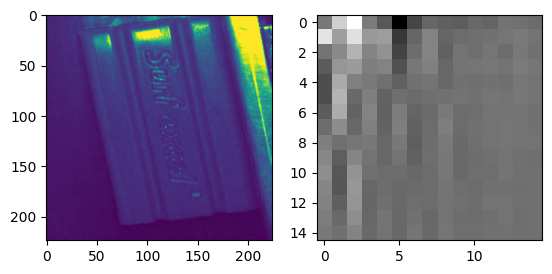

In [4]:
import matplotlib.pyplot as plt

img = train_dataset[90][0][0]
ft = np.fft.rfft2(img.real)

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax2.imshow(ft[:15, :15].real, cmap="gray")

np.complex64(0.6327303+0.08815326j)

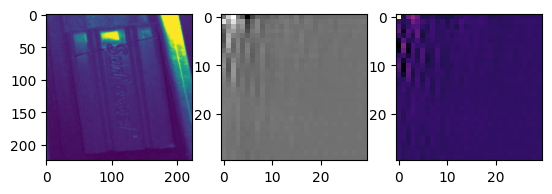

In [47]:
i = 70

img = train_dataset[i][0][0]
ft2 = np.fft.rfft2(img)
difference = ft - ft2

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img)
ax2.imshow(ft[:30, :30].real, cmap="gray")
ax3.imshow(difference[:30, :30].real, cmap="magma")

np.mean(difference)

  0%|          | 0/757 [00:00<?, ?it/s]

0.0
0.0
0.0


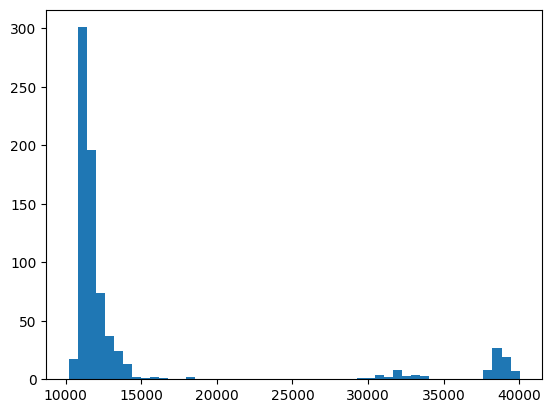

In [50]:
from tqdm.notebook import tqdm

diffs = []
correct0 = 0
total0 = 0
correct1 = 0
total1 = 0

for img, label in tqdm(train_dataset):
    ft2 = np.fft.rfft2(img)
    
    diff = ft - ft2
    diff = np.mean(diff.real ** 2 + diff.imag) 
    diffs.append(diff)

    if diff > 25000:
        prediction = 0
    else:
        prediction = 1
    
    if label == 0:
        total0 += 1
        correct0 += prediction == 0
    else:
        total1 += 1
        correct1 += prediction == 1
        

plt.hist(diffs, bins=50)
print(correct0 / total0)
print(correct1 / total1)
print((correct0 + correct1) / (total0 + total1))